#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [236]:
import Toolbox_ML as tlb
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



## Data

In [164]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv")
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


## Data exploration

In [165]:
tlb.describe_df(df)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
Tipos,int64,int64,object,object,object,float64,object,object,object,object,object,object,object,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,912,912,19,475,6,15,35,104,8,36,91,9,158,614
% Cardinalidad,100.0,100.0,2.08,52.08,0.66,1.64,3.84,11.4,0.88,3.95,9.98,0.99,17.32,67.32


Creo que "id", "laptop_ID" y "Product" no aportan informacion

In [166]:
feat_out = ["id", "laptop_ID", "Product"]

## Data processing

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


## Data processing

In [168]:
df["TypeName"].value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [169]:
feat_cat = ["TypeName"]

In [170]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                346
1366x768                                         208
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   32
Touchscreen 1366x768                              15
1600x900                                          11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                8
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 5
IPS Panel 1366x768                                 5
4K Ultra HD 3840x2160                              5
IPS Panel Touchscreen 1920x1200                    4
Touchscreen 2560x1440                              4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Touchscreen 2560x14

Las pantallas incrementan el precio del equipo cuanto mas resolucion tienen. Voy a extraer la resolucion. La calcularé en total de pixeles dividiré por 10e6.

In [171]:
patron = r"(\d+)x(\d+)"

In [172]:
df["Res_H"] = [int(re.search(patron, valor).group(1)) for valor in df["ScreenResolution"]]
df["Res_V"] = [int(re.search(patron, valor).group(2)) for valor in df["ScreenResolution"]]
df["Res_tot"] = df["Res_H"] * df["Res_V"] /1000000

In [173]:
feat_out += ["ScreenResolution", "Res_H", "Res_V"]

Analizo Cpu

In [174]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     142
Intel Core i7 7700HQ 2.8GHz    102
Intel Core i7 7500U 2.7GHz      88
Intel Core i5 8250U 1.6GHz      54
Intel Core i5 6200U 2.3GHz      51
                              ... 
Intel Core i7 7660U 2.5GHz       1
AMD E-Series E2-9000 2.2GHz      1
Intel Core i3 6006U 2.2GHz       1
Intel Core i7 2.8GHz             1
AMD E-Series 9000 2.2GHz         1
Name: count, Length: 104, dtype: int64

La CPUs incrementan el precio del equipo cuanto a mas velocidad(=GHz) de procesamiento tienen. Voy a extraer la velocidad.

In [175]:
list_cpu = [valor [-3:] for valor in df["Cpu"]]

In [176]:
GHz_freq = list_cpu.count("GHz") / len(list_cpu)
GHz_freq

1.0

Todo esta medido en GHZ

In [177]:
patron_1 = r"(\d+\.\d+)GHz"
patron_2 = r"(\d+)GHz"

In [178]:
list_cpu = []
for valor in df["Cpu"]:
    coincidencia_1 = re.search(patron_1, valor)
    coincidencia_2 = re.search(patron_2, valor)

    # Extraer el número si hay una coincidencia
    if coincidencia_1:
        ghz = float(coincidencia_1.group(1))  # Primer grupo de números decimales
        #print(f"Ghz_1: {ghz}")
        list_cpu.append(ghz)
    elif coincidencia_2:
        ghz = float(coincidencia_2.group(1))  # Primer grupo de números decimales
        list_cpu.append(ghz)
        #print(f"Ghz_2: {ghz}")
    else:
        print(f"Error {valor}")
    

len(list_cpu)      
    

912

In [179]:
df["GHz"] = list_cpu

In [180]:
feat_out += ["Cpu"]

In [181]:
df[["Cpu", "GHz", "Price_euros"]]

,Cpu,GHz,Price_euros
0,Intel Core i7 7500U 2.7GHz,2.7,749.00
1,Intel Pentium Quad Core N4200 1.1GHz,1.1,449.00
2,Intel Core i5 6200U 2.3GHz,2.3,1460.00
3,Intel Core i7 7700HQ 2.8GHz,2.8,2868.99
4,Intel Core i5 6300U 2.4GHz,2.4,1713.37
...,...,...,...
907,Intel Celeron Dual Core N3060 1.6GHz,1.6,389.00
908,Intel Core i5 6200U 2.3GHz,2.3,1195.00
909,AMD A8-Series 7410 2.2GHz,2.2,449.00
910,Intel Core i7 7600U 2.8GHz,2.8,1775.00


Analizo RAM

In [182]:
df["Ram"].value_counts()

Ram
8GB     434
4GB     274
16GB    125
6GB      32
2GB      16
12GB     15
32GB     14
24GB      2
Name: count, dtype: int64

La convierto en un entero

In [183]:
patron = r"(\d+)GB"

In [184]:
df["Ram_GB"] = [int(re.search(patron, valor).group(1)) for valor in df["Ram"]]

In [185]:
feat_out += ["Ram"]

In [186]:
df["Memory"].value_counts()

Memory
256GB SSD                        293
1TB HDD                          150
500GB HDD                        100
512GB SSD                         75
128GB SSD +  1TB HDD              61
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
64GB Flash Storage                11
2TB HDD                           11
512GB SSD +  1TB HDD              10
1TB SSD                            9
1.0TB Hybrid                       7
256GB Flash Storage                7
32GB SSD                           5
180GB SSD                          5
256GB SSD +  2TB HDD               4
16GB Flash Storage                 4
16GB SSD                           3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB Flash Storage                2
512GB SSD +  2TB HDD               2
512GB Flash Storage                2
1.0TB HDD                          1
32GB HDD                           1
128GB SSD +  2TB HDD           

Veo muy complicado extraer informacion numerica de aquí. Y como categorica tiene muchas clases. De momento no la cojo

In [187]:
feat_out += ["Memory"]

In [188]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      199
Intel HD Graphics 520      138
Intel UHD Graphics 620      45
Nvidia GeForce GTX 1050     43
Nvidia GeForce GTX 1060     31
                          ... 
Nvidia GeForce 920MX         1
Intel HD Graphics 620        1
AMD Radeon R7 M365X          1
Nvidia Quadro M2200M         1
Nvidia Quadro M520M          1
Name: count, Length: 91, dtype: int64

Veo muy complicado extraer informacion numerica de aquí. Y como categorica tiene muchas clases. De momento no la cojo

In [189]:
feat_out += ["Gpu"]

In [190]:
df["OpSys"].value_counts(True)

OpSys
Windows 10      0.817982
Linux           0.051535
No OS           0.048246
Windows 7       0.035088
Chrome OS       0.021930
macOS           0.012061
Mac OS X        0.006579
Windows 10 S    0.004386
Android         0.002193
Name: proportion, dtype: float64

In [191]:
feat_out += ["OpSys"]

Como categorica podríamos cogerla. Pero nos añade 9 columnas. Podríamos agrupar en Windows y el resto. Pero esta muy concentrada en Windows. No creo que nos aporte mucha informacion. De momento no la cojo

In [192]:
df["Company"].value_counts(True)

Company
Lenovo       0.228070
Dell         0.226974
HP           0.207237
Asus         0.118421
Acer         0.082237
Toshiba      0.040570
MSI          0.037281
Apple        0.018640
Mediacom     0.007675
Razer        0.006579
Samsung      0.006579
Fujitsu      0.003289
Microsoft    0.003289
Vero         0.003289
Xiaomi       0.003289
Google       0.002193
Chuwi        0.002193
LG           0.001096
Huawei       0.001096
Name: proportion, dtype: float64

In [193]:
def mapear_company(valor):
    if valor not in ['Lenovo', 'Dell', 'HP']:
        return 'Resto'
    else:
        return valor

In [194]:
df['Company_map'] = df['Company'].apply(mapear_company)

In [195]:
feat_cat += ["Company_map"]

In [196]:
feat_out += ["Company"]

Company la he agrupado en 4 clases.

Veamos Weight

In [197]:
df["Weight"].value_counts(True)

Weight
2.2kg     0.094298
2.1kg     0.043860
2.3kg     0.038377
2.4kg     0.033991
2kg       0.032895
            ...   
4.0kg     0.001096
0.98kg    0.001096
3.6kg     0.001096
2.99kg    0.001096
1.79kg    0.001096
Name: proportion, Length: 158, dtype: float64

La convierto en un float

In [198]:
patron_1 = r"(\d+\.\d+)kg"
patron_2 = r"(\d+)kg"

In [199]:
list_weight = []
for valor in df["Weight"]:
    coincidencia_1 = re.search(patron_1, valor)
    coincidencia_2 = re.search(patron_2, valor)

    # Extraer el número si hay una coincidencia
    if coincidencia_1:
        ghz = float(coincidencia_1.group(1))  # Primer grupo de números decimales
        #print(f"Ghz_1: {ghz}")
        list_weight.append(ghz)
    elif coincidencia_2:
        ghz = float(coincidencia_2.group(1))  # Primer grupo de números decimales
        list_weight.append(ghz)
        #print(f"Ghz_2: {ghz}")
    else:
        print(f"Error {valor}")
    

len(list_weight)    

912

In [200]:
df["Weight_Kg"] = list_weight

In [201]:
feat_out += ["Weight"]

In [202]:
train = df.drop(columns=feat_out)
train

,TypeName,Inches,Price_euros,Res_tot,GHz,Ram_GB,Company_map,Weight_Kg
0,Notebook,15.6,749.00,1.049088,2.7,8,Dell,2.36
1,Notebook,15.6,449.00,1.049088,1.1,4,Resto,2.00
2,Notebook,13.3,1460.00,2.073600,2.3,8,Resto,1.20
3,Gaming,15.6,2868.99,8.294400,2.8,16,Dell,4.42
4,Ultrabook,12.5,1713.37,2.073600,2.4,8,Dell,1.26
...,...,...,...,...,...,...,...,...
907,2 in 1 Convertible,11.6,389.00,1.049088,1.6,4,Resto,1.25
908,Notebook,13.3,1195.00,2.073600,2.3,4,Resto,1.20
909,Notebook,15.6,449.00,1.049088,2.2,8,Resto,2.40
910,Ultrabook,14.0,1775.00,2.073600,2.8,8,Dell,1.36


In [203]:
feat_cat

['TypeName', 'Company_map']

## MiniEDA

In [204]:
target = "Price_euros"

In [268]:
196 / train[target].mean()

0.17687569204623205

In [205]:
feat_num = [col for col in train.columns if (not (col in feat_cat)) & (col !=target)]

(6, 2)


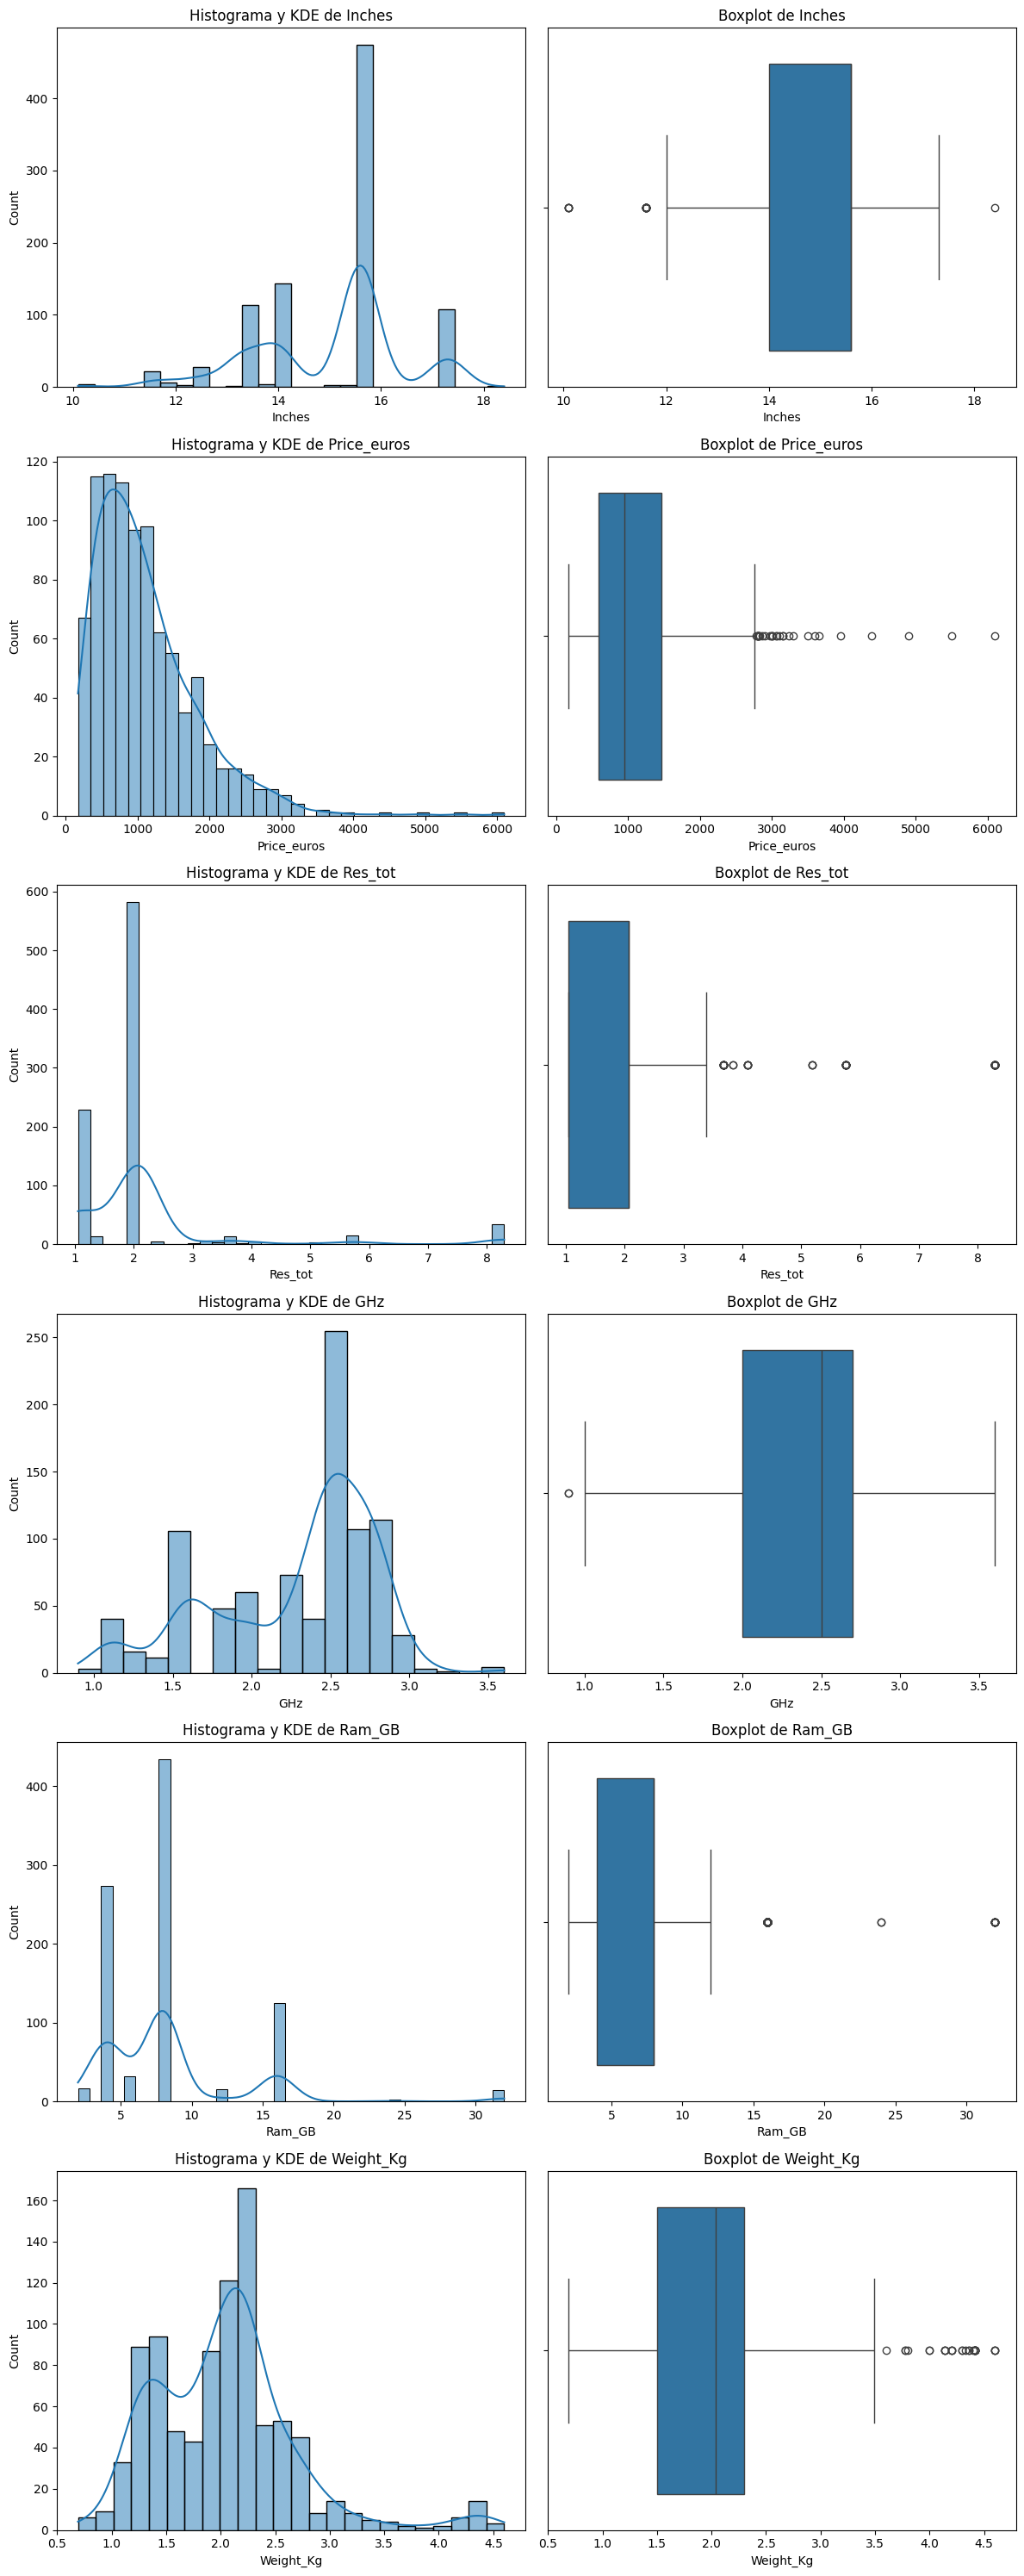

In [206]:
bt.plot_combined_graphs(train, [col for col in train.columns if not (col in feat_cat)])

In [207]:
train  = pd.get_dummies(train, columns=feat_cat)
train

,Inches,Price_euros,Res_tot,GHz,Ram_GB,Weight_Kg,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Company_map_Dell,Company_map_HP,Company_map_Lenovo,Company_map_Resto
0,15.6,749.00,1.049088,2.7,8,2.36,False,False,False,True,False,False,True,False,False,False
1,15.6,449.00,1.049088,1.1,4,2.00,False,False,False,True,False,False,False,False,False,True
2,13.3,1460.00,2.073600,2.3,8,1.20,False,False,False,True,False,False,False,False,False,True
3,15.6,2868.99,8.294400,2.8,16,4.42,False,True,False,False,False,False,True,False,False,False
4,12.5,1713.37,2.073600,2.4,8,1.26,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,11.6,389.00,1.049088,1.6,4,1.25,True,False,False,False,False,False,False,False,False,True
908,13.3,1195.00,2.073600,2.3,4,1.20,False,False,False,True,False,False,False,False,False,True
909,15.6,449.00,1.049088,2.2,8,2.40,False,False,False,True,False,False,False,False,False,True
910,14.0,1775.00,2.073600,2.8,8,1.36,False,False,False,False,True,False,True,False,False,False


-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [227]:
train_set, test_set = train_test_split(train, test_size = 0.2, random_state= 42)

### 2. Dividir X_train, X_test, y_train, y_test

In [228]:
X_train = train_set.drop(columns=target)
y_train = train_set[target]
X_test = test_set.drop(columns=target)
y_test = test_set[target]

### 3. Crear y entrenar el modelo


In [229]:
model_names = ["Reg. Lineal", "Random Forest","XGBoost","LightGBM","CatBoost"]

lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state= 42)
xgb_clf = XGBRegressor(random_state = 42)
lgb_clf = LGBMRegressor(random_state= 42, verbose = -100)

model_set = [lr_clf, rf_clf, xgb_clf, lgb_clf]

In [230]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(f"Para {nombre}:", end = " ")
    metrica = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_mean_absolute_error")
    #if nombre not in ["KNN", "Reg. Logistica"]:
    #    metrica = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "MAE")
    #else:
    #    metrica = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "balanced_accuracy")
    print(np.mean(metrica))
    metricas_cv[nombre] = metrica
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"And the winner is: {ganador} con una metrica de {np.mean(metricas_cv[ganador])}")

Para Reg. Lineal: -270.57126887391746
Para Random Forest: -217.2349126598733
Para XGBoost: -214.70648903761708
Para LightGBM: -223.15958166055782
And the winner is: XGBoost con una metrica de -214.70648903761708


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [262]:
rf_clf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [264]:
# Hacer predicciones
y_pred = rf_clf.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R^2: {r2}")

MAE: 204.23257838740642
R^2: 0.7376376717988625


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

In [231]:
X_train_tot = train.drop(columns=target)
y_train_tot = train[target]

In [265]:
rf_clf.fit(X_train_tot, y_train_tot)

RandomForestRegressor(random_state=42)

In [266]:
# Hacer predicciones
y_pred_tot = rf_clf.predict(X_train_tot)

# Evaluar el modelo
mae = mean_absolute_error(y_train_tot, y_pred_tot)
r2 = r2_score(y_train_tot, y_pred_tot)

print(f"MAE: {mae}")
print(f"R^2: {r2}")

MAE: 86.82053903052537
R^2: 0.9630149830326232


### 2. Carga los datos de `test.csv` para predecir.

In [238]:
test = pd.read_csv("./data/test_tratado.csv")

In [239]:
test

,Unnamed: 0,Inches,Res_tot,GHz,Ram_GB,Weight_Kg,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Company_map_Dell,Company_map_HP,Company_map_Lenovo,Company_map_Resto
0,0,13.3,8.294400,2.7,16,1.30,False,False,False,False,True,False,False,True,False,False
1,1,15.6,1.049088,2.7,8,2.20,False,False,False,True,False,False,False,False,False,True
2,2,15.6,1.049088,2.0,4,2.40,False,False,False,True,False,False,False,False,False,True
3,3,14.0,2.073600,2.3,8,1.43,False,False,False,True,False,False,False,True,False,False
4,4,13.3,2.073600,2.5,8,1.34,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,15.6,2.073600,2.8,8,2.40,False,True,False,False,False,False,False,False,True,False
387,387,15.6,2.073600,2.6,16,3.31,False,True,False,False,False,False,False,False,True,False
388,388,15.6,1.049088,2.5,4,1.96,False,False,False,True,False,False,False,True,False,False
389,389,15.6,2.073600,1.5,4,2.10,False,False,False,True,False,False,False,True,False,False


In [241]:
test = test.drop(columns="Unnamed: 0")

In [242]:
test

,Inches,Res_tot,GHz,Ram_GB,Weight_Kg,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Company_map_Dell,Company_map_HP,Company_map_Lenovo,Company_map_Resto
0,13.3,8.294400,2.7,16,1.30,False,False,False,False,True,False,False,True,False,False
1,15.6,1.049088,2.7,8,2.20,False,False,False,True,False,False,False,False,False,True
2,15.6,1.049088,2.0,4,2.40,False,False,False,True,False,False,False,False,False,True
3,14.0,2.073600,2.3,8,1.43,False,False,False,True,False,False,False,True,False,False
4,13.3,2.073600,2.5,8,1.34,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,15.6,2.073600,2.8,8,2.40,False,True,False,False,False,False,False,False,True,False
387,15.6,2.073600,2.6,16,3.31,False,True,False,False,False,False,False,False,True,False
388,15.6,1.049088,2.5,4,1.96,False,False,False,True,False,False,False,True,False,False
389,15.6,2.073600,1.5,4,2.10,False,False,False,True,False,False,False,True,False,False


In [243]:
# Hacer predicciones
y_pred_test = rf_clf.predict(test)


**¿Por qué puede dar error?** 

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
predictions = model.predict(X_pred)
predictions

NameError: name 'model' is not defined

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [244]:
sample = pd.read_csv("./data/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [245]:
sample.head()

,id,Price_euros
0,1014,752.0
1,845,499.0
2,1151,1747.0
3,1265,245.0
4,573,1179.0


In [246]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [253]:
test_original = pd.read_csv("./data/test.csv")

In [254]:
df_pred = pd.DataFrame(test_original["id"])

In [255]:
df_pred["Price_euros"] = y_pred_test
df_pred


,id,Price_euros
0,181,2255.264667
1,708,780.277752
2,862,432.353914
3,1064,1372.849267
4,702,1325.114717
...,...,...
386,1281,1127.838667
387,524,1673.773367
388,1015,714.702797
389,1236,484.900226


In [260]:
df_pred.to_csv("submission_01.csv", index = False)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [258]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")


In [259]:
chequeator(df_pred) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!


NameError: name 'urllib' is not defined